In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's a the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
df_re = pd.read_pickle('../pickles/utseus-anjuke-real-estate.pk')
# df_re is a list
df_re = pd.DataFrame(df_re[1:], columns=df_re[0])

In [3]:
df_re.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.34392735101,31.3193561718426,2,2,30.0,1160000.0,38666.6666666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407324884273,31.3023675431043,1,1,38.0,1950000.0,51315.7894736842,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487377268,31.2908711986862,3,2,92.0,5350000.0,58152.1739130435,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487377268,31.2908711986862,2,2,68.0,4350000.0,63970.5882352941,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397234518,31.302658471085,2,2,80.0,4000000.0,50000.0,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


In [4]:
#df_re has no na value
print(len(df_re))
print(len(df_re.dropna()))

467029
467029


In [5]:
#df_re has some empty field
df_re = df_re[(df_re.longitude != "") & (df_re.latitude != "")]
print(len(df_re))

463067


In [6]:
df_re.onesquaremeter.describe()

count      463067
unique      35828
top       50000.0
freq         4345
Name: onesquaremeter, dtype: object

In [7]:
print(type(df_re.onesquaremeter.iloc[0]))
print(type(df_re.room.iloc[0]))
print(type(df_re.longitude.iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
# We need to convert the type of the values
df_re.bedroom = df_re.bedroom.apply(int)
df_re.room = df_re.room.apply(int)
df_re.onesquaremeter = df_re.onesquaremeter.apply(float)
df_re.price = df_re.price.apply(float)
df_re.surface = df_re.surface.apply(float)
df_re.longitude = df_re.longitude.apply(float)
df_re.latitude = df_re.latitude.apply(float)

In [9]:
gdf_re = gpd.GeoDataFrame(df_re, geometry = [Point(x,y) for x,y in zip(df_re.longitude, df_re.latitude)])
gdf_re.crs = {'init': 'epsg:4326'} #world degree

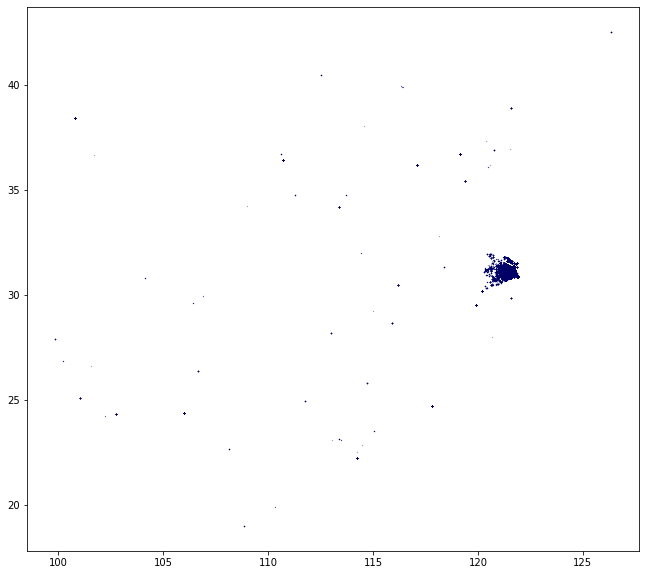

In [10]:
gdf_re.plot(markersize=0.02, c='#000066', figsize=(15,10))

In [11]:
time = ManagingTime()
time.displayStartTime()

gdf_re = gdf_re.loc[gdf_re.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-06 15:31:11.257577
Running time: 0:01:33.489043


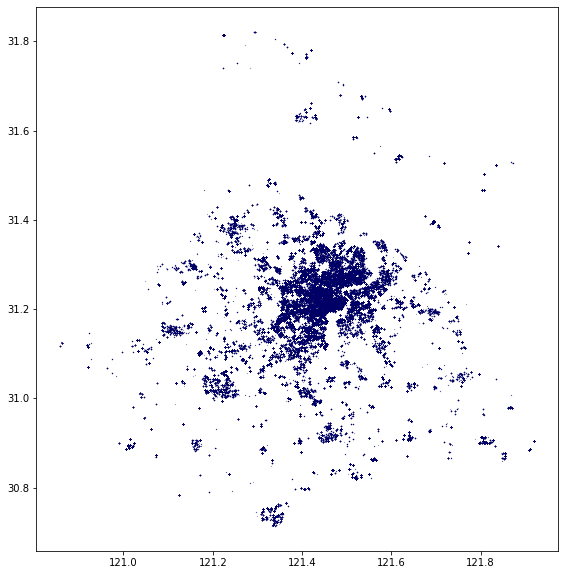

In [12]:
gdf_re.plot(markersize=0.02, c='#000066', figsize=(15,10))

In [13]:
print(len(gdf_re))
# We removed 11 310 points outside of Shanghai

451757


In [14]:
gdf_re.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done,geometry
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1,POINT (121.34392735101 31.3193561718426)
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1,POINT (121.407324884273 31.3023675431043)
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1,POINT (121.421397234518 31.302658471085)


In [15]:
#No duplicated lines in real_estate dataset if we keep every column
gdf_re[gdf_re.duplicated(keep = 'first', subset=gdf_re.columns.difference(['geometry']))]

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done,geometry


In [16]:
#There are duplicated lines in real_estate dataset if we remove column id
gdf_re[gdf_re.duplicated(keep = 'first', subset=gdf_re.columns.difference(['id','geometry']))]

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done,geometry
9,A880302877,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
81,A876599415,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,3,2,129.0,7700000.0,59689.922481,四房两卫，婚装40万，置换徐汇名校，中区，空间大！急售！！！,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
84,A876690258,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,1,1,55.0,3500000.0,63636.363636,"*大一房，临地铁,高区景观，房东变现诚售。",baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
85,A877366249,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,91.0,4100000.0,45054.945055,金地艺境(宝山)(555弄) 91.39平米 410.0万元,baoshan,dachang,1,POINT (121.34392735101 31.3193561718426)
94,A871779321,宝山-大场 滨江雅苑,121.409048,31.279768,3,2,125.0,7800000.0,62400.000000,降价急售！南北通三房，满5年，楼层佳，环境优美，靠近地铁7号,baoshan,dachang,1,POINT (121.409047864216 31.2797676308771)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467003,A893287978,闵行-颛桥 绿城玫瑰园,121.453931,31.232433,6,4,1011.0,76990000.0,76152.324431,绿城玫瑰园+独栋别墅+三面环水+岛中大宅+占地7亩地+游泳池,minhang,zhuanqiao,1,POINT (121.453930975551 31.2324329852162)
467015,A888463011,闵行-颛桥 上海星河湾,121.403621,31.089985,3,2,248.0,15000000.0,60483.870968,星河湾一期3+1户型 全配家具 满两年 实图实价只有我敢发,minhang,zhuanqiao,1,POINT (121.40362132705 31.0899847443612)
467016,A892193712,闵行-颛桥 天恒名城,121.387736,31.058388,4,2,182.0,9600000.0,52747.252747,天恒名城 高端商品房 豪华装修 拎包即可入住 业主出国急售,minhang,zhuanqiao,1,POINT (121.387736331626 31.058388129757)
467023,A883996919,闵行-颛桥 银都新村(1-7区),121.389644,31.096175,1,1,47.0,2350000.0,50000.000000,一房的价格买两房的面积，43平米的面积56平米的使用面积！,minhang,zhuanqiao,1,POINT (121.389643913733 31.0961747808186)


In [17]:
gdf_re = gdf_re.drop_duplicates(keep = 'first', subset=gdf_re.columns.difference(['id','geometry']))

In [18]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_re['longitude_m'] = gdf_re[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_re['latitude_m'] = gdf_re[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

In [19]:
gdf_re = gdf_re[['bedroom','room','surface', 'price', 'onesquaremeter','longitude','latitude','longitude_m','latitude_m']]

In [20]:
gdf_re = gpd.GeoDataFrame(gdf_re, geometry = [Point(x,y) for x,y in zip(gdf_re.longitude_m, gdf_re.latitude_m)])
gdf_re.crs = {'init': 'epsg:4479'} #china metric projection

In [21]:
gdf_re.head()

,bedroom,room,surface,price,onesquaremeter,longitude,latitude,longitude_m,latitude_m,geometry
0,2,2,30.0,1160000.0,38666.666667,121.343927,31.319356,-2.836858e+06,4.657763e+06,POINT (-2836857.805841852 4657763.196774267)
1,1,1,38.0,1950000.0,51315.789474,121.407325,31.302368,-2.842520e+06,4.655457e+06,POINT (-2842519.974292506 4655456.831275352)
2,3,2,92.0,5350000.0,58152.173913,121.397487,31.290871,-2.842066e+06,4.656510e+06,POINT (-2842065.562511969 4656510.001422781)
3,2,2,68.0,4350000.0,63970.588235,121.397487,31.290871,-2.842066e+06,4.656510e+06,POINT (-2842065.562511969 4656510.001422781)
4,2,2,80.0,4000000.0,50000.000000,121.421397,31.302658,-2.843655e+06,4.654744e+06,POINT (-2843654.572927243 4654744.241334365)


In [22]:
gdf_re.to_pickle('../clean_pickles/real_estate.pk')

In [23]:
gdf_re = pd.read_pickle('../clean_pickles/real_estate.pk')

In [24]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [25]:
type(gdf_target)

geopandas.geodataframe.GeoDataFrame

In [26]:
gdf_target.crs

{'init': 'epsg:4479'}

In [28]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [27]:
#need 22:46 to run
time = ManagingTime()
time.displayStartTime()

gdf_target['av_onesquaremeter_re'] = np.nan
gdf_target['av_bedroom_re'] = np.nan
for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_re_temp = gdf_re.loc[gdf_re.within(value.surface_buffer)]
    gdf_target.av_onesquaremeter_re.loc[index] = gdf_re_temp['onesquaremeter'].mean()
    gdf_target.av_bedroom_re.loc[index] = gdf_re_temp['bedroom'].mean()

gdf_target.to_pickle('../clean_pickles/target_real_estate.pk')

time.displayEndTime()
time.displayRunningTime()

Starting time: 2020-01-06 15:34:56.813340
466
Ending time: 2020-01-06 15:55:53.177314
Running time: 0:20:56.363974


In [28]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer,av_onesquaremeter_re,av_bedroom_re
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...,30691.196946,2.243077
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,...",59235.578448,2.503425
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,...",41258.655137,2.174888
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...,62855.093684,2.244413
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...,70179.994580,2.307692
